#**Student ID : 2201912**#

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


#Importing required libraries for model 1#

In [3]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 805.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=83b9132417036209516dba2260f2a73381e491956a08a030f4e0ba16c05b4e6c
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [4]:
import os
import re
import io
import nltk
import torch
import pickle
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
import fasttext
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,classification_report
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

nltk.download('punkt')
nltk.download('stopwords')
from sklearn.svm import SVC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Setting my student ID as random seed#

Using my student ID as seed value for the NumPy and PyTorch libraries, respectively. Setting this random seed ensures that the sequence of random numbers generated by these libraries will be the same every time I run my codes.

In [5]:
student_id = 2201912

In [6]:
#setting student id as seed for all libraries
#numpy seed
np.random.seed(student_id)

#torch seed
torch.manual_seed(student_id)

##Common Codes##

In [7]:
#Setting folder path in my drive for part2 of the assignment
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Part2/', str(student_id))
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['test.csv', 'valid.csv', 'models', 'train_100.csv', 'train_25.csv', 'train_50.csv', 'train.csv', 'train_75.csv']


#Method to load  CSV file into a pandas dataframe#

The csv files were loaded into a dataframe and I  performed some exploratory analysis to understand the dataset

In [8]:
def load_csv_file(file_location):
  return pd.read_csv(file_location)

In [9]:
train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')

train_df = load_csv_file(train_file)
train_df.head()

,Unnamed: 0,text_id,text,label
0,2944,hasoc_en_2945,@MollyJongFast And of course they placed Hilla...,HOF
1,235,hasoc_en_236,"Makes sense, which is tragic. #TrumpisaCrimina...",NOT
2,2594,hasoc_en_2595,@FFan__ @mahan_saria Why does it not rain when...,NOT
3,1235,hasoc_en_1236,@realDonaldTrump Tremendous crowds? I was ther...,NOT
4,981,hasoc_en_982,prison would be too good for him. #toryscum #m...,NOT


In [10]:
train_df.info

<bound method DataFrame.info of       Unnamed: 0        text_id  \
0           2944  hasoc_en_2945   
1            235   hasoc_en_236   
2           2594  hasoc_en_2595   
3           1235  hasoc_en_1236   
4            981   hasoc_en_982   
...          ...            ...   
4676        5358  hasoc_en_5359   
4677        4854  hasoc_en_4855   
4678         552   hasoc_en_553   
4679        3990  hasoc_en_3991   
4680         660   hasoc_en_661   

                                                   text label  
0     @MollyJongFast And of course they placed Hilla...   HOF  
1     Makes sense, which is tragic. #TrumpisaCrimina...   NOT  
2     @FFan__ @mahan_saria Why does it not rain when...   NOT  
3     @realDonaldTrump Tremendous crowds? I was ther...   NOT  
4     prison would be too good for him. #toryscum #m...   NOT  
...                                                 ...   ...  
4676  @realDonaldTrump Prince of Whales, is that Aqu...   HOF  
4677  Because cats are pussy. Not o

In [11]:
# Checking for duplicates in the dataframe
duplicates = train_df.duplicated()

# Print the number of duplicates
print("Number of duplicates: ", duplicates.sum())

# Print the duplicate rows
print("Duplicate rows:\n", train_df[duplicates])

Number of duplicates:  0
Duplicate rows:
 Empty DataFrame
Columns: [Unnamed: 0, text_id, text, label]
Index: []


In [12]:
label_counts = train_df['label'].value_counts()
print("Label distribution:\n", label_counts)

Label distribution:
 NOT    2872
HOF    1809
Name: label, dtype: int64


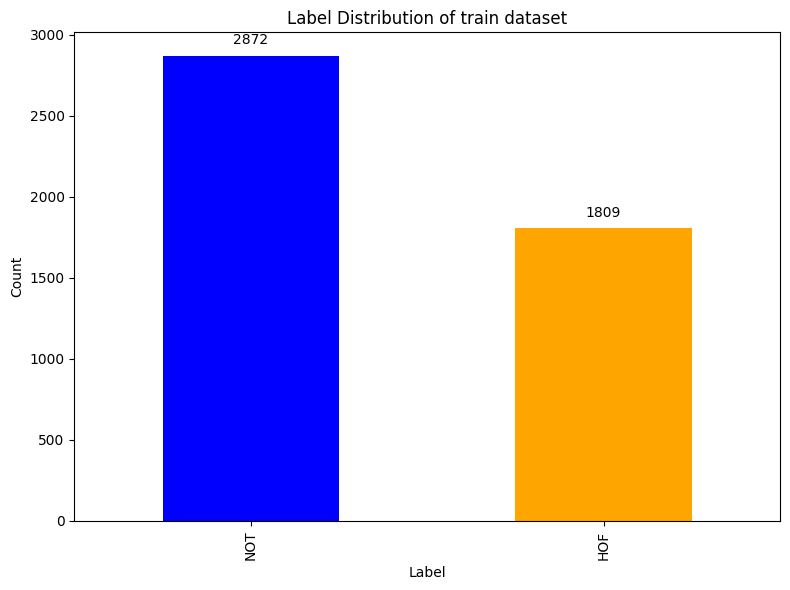

In [13]:

label_counts = train_df['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
label_counts.plot(kind='bar', color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution of train dataset')

# Add data labels on top of the bars
for index, value in enumerate(label_counts):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
pip install wordcloud


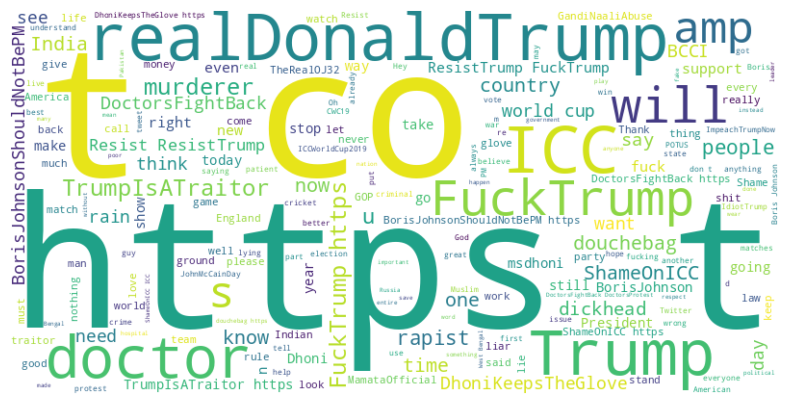

In [15]:

from wordcloud import WordCloud

train_df = load_csv_file(train_file)

text_data = ' '.join(train_df['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [16]:
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')

test_df = load_csv_file(test_file)
test_df.head()

,Unnamed: 0,text_id,text,label
0,0,hasoc_en_902,West Bengal Doctor Crisis: Protesting doctors ...,NOT
1,1,hasoc_en_416,68.5 million people have been forced to leave ...,NOT
2,2,hasoc_en_207,"You came, you saw .... we will look after the ...",NOT
3,3,hasoc_en_595,We'll get Brexit delivered by October 31st. ...,NOT
4,4,hasoc_en_568,Fuck you. Go back to the dark ages you cow @IB...,HOF


In [17]:
test_df.info

<bound method DataFrame.info of       Unnamed: 0         text_id  \
0              0    hasoc_en_902   
1              1    hasoc_en_416   
2              2    hasoc_en_207   
3              3    hasoc_en_595   
4              4    hasoc_en_568   
...          ...             ...   
1148        1148  hasoc_en1_3958   
1149        1149  hasoc_en1_4648   
1150        1150  hasoc_en1_4832   
1151        1151  hasoc_en1_3721   
1152        1152   hasoc_en1_991   

                                                   text label  
0     West Bengal Doctor Crisis: Protesting doctors ...   NOT  
1     68.5 million people have been forced to leave ...   NOT  
2     You came, you saw .... we will look after the ...   NOT  
3     We'll get Brexit delivered by October 31st.   ...   NOT  
4     Fuck you. Go back to the dark ages you cow @IB...   HOF  
...                                                 ...   ...  
1148  Each of the divorce must be pronounced with a ...   NOT  
1149  He is 62-yr-old H

In [18]:
label_counts = test_df['label'].value_counts()
print("Label distribution:\n", label_counts)

Label distribution:
 NOT    865
HOF    288
Name: label, dtype: int64


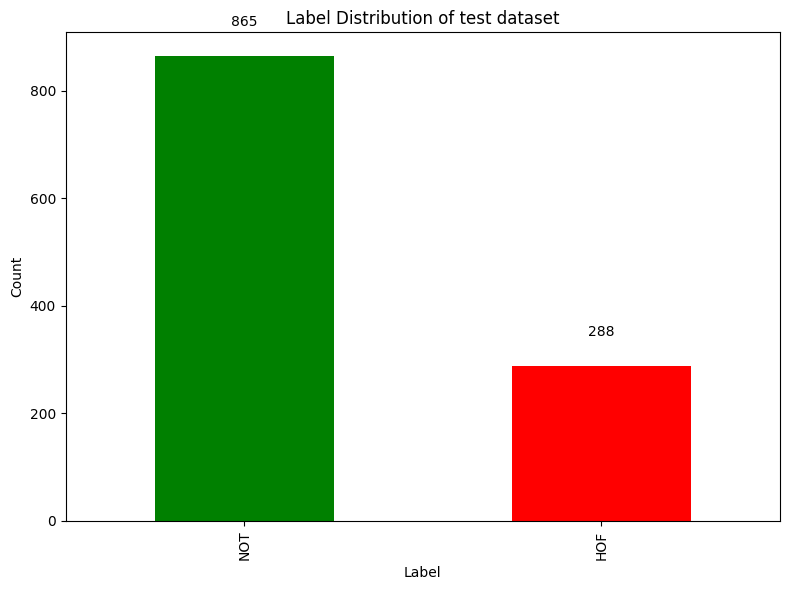

In [19]:

label_counts = test_df['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
label_counts.plot(kind='bar', color=['green', 'red'])

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution of test dataset')

# Add data labels on top of the bars
for index, value in enumerate(label_counts):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


#Splitting training data into 4 sub-sets of [25%, 50%, 75%, and 100%] of the original dataset#

To split the training dataset into four subset of 25%, 50%, 75% and 100%, and to achieve an unbiased split, the code below employs the StratifiedShuffleSplit function from the sklearn library. This ensures that the resulting datasets maintain a similar distribution of label values.

In [20]:

train_set = pd.DataFrame({'' : []})

splitter = StratifiedShuffleSplit(n_splits=4, test_size=0.25)


for i, (train_index, test_index) in enumerate(splitter.split(train_df, train_df['label'])):
  data_set = train_df.iloc[test_index]

  if(train_set.empty):

    train_set = data_set
  else:

    train_set = pd.concat([train_set, data_set])

  train_file_name = f'train_{(i+1) * 25}.csv'
  train_file_path = os.path.join(GOOGLE_DRIVE_PATH, train_file_name)
  train_set.to_csv(train_file_path, index=False)
  print('Saved train file', train_file_name,'to Part2 folder')

Saved train file train_25.csv to Part2 folder
Saved train file train_50.csv to Part2 folder
Saved train file train_75.csv to Part2 folder
Saved train file train_100.csv to Part2 folder


#Setting Models path, Directories and Output files#

In [21]:
train_25_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv')
print('Train 25% file: ', train_25_file)

train_50_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_50.csv')
print('Train 50% file: ', train_50_file)

train_75_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_75.csv')
print('Train 75% file: ', train_75_file)

train_100_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_100.csv')
print('Train 25% file: ', train_100_file)

val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)

print('\n')
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25')
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50')
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75')
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100')
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)

print('\n')
model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv')
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)

model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv')
print('Output file name using model 1 using 50% of train data: ',model_1_50_output_test_file)

model_1_75_output_test_file = os.path.join(MODEL_1_75_DIRECTORY, 'output_test.csv')
print('Output file name using model 1 using 75% of train data: ',model_1_75_output_test_file)

model_1_100_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv')
print('Output file name using model 1 using 100% of train data: ',model_1_100_output_test_file)



Train 25% file:  drive/MyDrive/./CE807/Part2/2201912/train_25.csv
Train 50% file:  drive/MyDrive/./CE807/Part2/2201912/train_50.csv
Train 75% file:  drive/MyDrive/./CE807/Part2/2201912/train_75.csv
Train 25% file:  drive/MyDrive/./CE807/Part2/2201912/train_100.csv
Validation file:  drive/MyDrive/./CE807/Part2/2201912/valid.csv
Test file:  drive/MyDrive/./CE807/Part2/2201912/test.csv


Model 1 directory:  drive/MyDrive/./CE807/Part2/2201912/models/1
Model 1 directory with 25% data:  drive/MyDrive/./CE807/Part2/2201912/models/1/25
Model 1 directory with 50% data:  drive/MyDrive/./CE807/Part2/2201912/models/1/50
Model 1 directory with 75% data:  drive/MyDrive/./CE807/Part2/2201912/models/1/75
Model 1 directory with 100% data:  drive/MyDrive/./CE807/Part2/2201912/models/1/100


Output file name using model 1 using 25% of train data:  drive/MyDrive/./CE807/Part2/2201912/models/1/25/output_test.csv
Output file name using model 1 using 50% of train data:  drive/MyDrive/./CE807/Part2/2201912/m

#Preprocessing#

Text preprocessing is an essential step in text classisfication because it readies text for effective classification.

The remove_stopwords function takes a text input as a parameter, processes the text to remove common stop words from the English language, and then returns the processed text without those stop words.



In [22]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  tokens = nltk.word_tokenize(text)
  tokens = [token for token in tokens if token not in stop_words]

  return ' '.join(tokens)

In [23]:
def cleanup_text(text):
  text = text.lower()
  text = ' '.join(text.split())
  text = re.sub(r'[^\w\s]+', '', text)

  return remove_stopwords(text)

#Computing Performance Metrices#

In [24]:
def compute_performance(y_true, y_pred, action='test'):
  print('Computing different preformance metrics on', action, 'set of Dataset')
  accuracy = accuracy_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred, average = 'macro')
  precision = precision_score(y_true, y_pred, average = 'macro')
  f1 = f1_score(y_true, y_pred, average = 'macro')

  if action != 'comparison':
    print('Accuracy:', accuracy)
    print('Recall (macro):', recall)
    print('Precision (macro):', precision)
    print('F1 Score (macro):', f1)
    print('\nConfusion Matrix:')
    c_matrix = confusion_matrix(y_true, y_pred, labels = ['NOT', 'HOF'])
    c_matrix_display = ConfusionMatrixDisplay(c_matrix, display_labels=['NOT', 'HOF']).plot()
    plt.show()

  print('\n')

  return f1

#Method 1#


#Creating a function to prepare dataset for FastText classification#

In [25]:
def prepare_dataset1(data_file, model_dir = None, action = 'test'):
  data = data_file.copy()
  data['text'] = data['text'].apply(cleanup_text)

  if action == 'train':
    dataset_file = os.path.join(model_dir, f'{action}_dataset.txt')
    with open(dataset_file, "w", encoding="utf-8") as f:
      for i in range(len(data)):
        f.write("__label__" + str(data.iloc[i]["label"]) + " " + data.iloc[i]["text"] + "\n")

    return dataset_file, data['text']
  else:
    return data['text']


In [26]:
def train_model1(dataset_file):
  print('Let\'s start training FastText model')
  return fasttext.train_supervised(input=dataset_file)

In [27]:
def save_model1(model, model_dir):
  # save the model to disk
  model_file = os.path.join(model_dir, 'model.bin')
  model.save_model(model_file)
  print('Saved model to ', model_file)

  return model_file

In [28]:
def load_model1(model_file):
  # Load model from disk
  model = fasttext.load_model(model_file)
  print('Loaded model from ', model_file)

  return model

In [29]:
def model1_predictions(model, dataset):
  predicted_labels = []
  for index, text in dataset.items():
    label, probability = model.predict(text)
    predicted_labels.append(label[0].replace('__label__', ''))

  return predicted_labels

#Training Method 1#

In [30]:
def train_method1(train_file, val_file, model_dir):
  train_df = load_csv_file(train_file)
  val_df = load_csv_file(val_file)

  train_label = train_df['label']
  val_label = val_df['label']

  train_dataset_file, train_dataset = prepare_dataset1(train_df, model_dir, action ='train')
  val_dataset = prepare_dataset1(val_df, model_dir, action = 'valid')

  model = train_model1(train_dataset_file)

  model_file = save_model1(model, model_dir)

  train_pred_labels = model1_predictions(model, train_dataset)
  val_pred_labels = model1_predictions(model, val_dataset)

  print('Train Split')
  train_f1_score = compute_performance(train_label, train_pred_labels, action='train')

  print('Validation Split')
  val_f1_score = compute_performance(val_label, val_pred_labels, action='valid')

  return model_file

Train using of 25% of data
Let's start training FastText model
Saved model to  drive/MyDrive/./CE807/Part2/2201912/models/1/25/model.bin
Train Split
Computing different preformance metrics on train set of Dataset
Accuracy: 0.6131511528608027
Recall (macro): 0.5
Precision (macro): 0.30657557643040134
F1 Score (macro): 0.3800952885124404

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


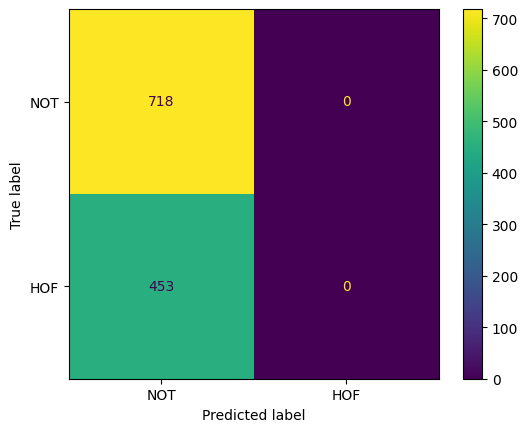



Validation Split
Computing different preformance metrics on valid set of Dataset
Accuracy: 0.61400512382579
Recall (macro): 0.5
Precision (macro): 0.307002561912895
F1 Score (macro): 0.38042328042328044

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


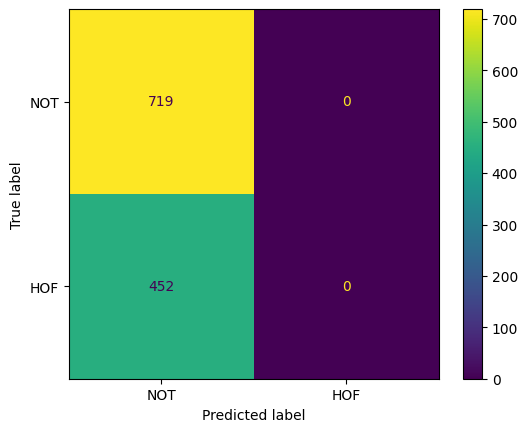

In [31]:
print('Train using of 25% of data')
model_1_25_file = train_method1(train_25_file, val_file, MODEL_1_25_DIRECTORY)

Train using of 50% of data
Let's start training FastText model
Saved model to  drive/MyDrive/./CE807/Part2/2201912/models/1/50/model.bin
Train Split
Computing different preformance metrics on train set of Dataset
Accuracy: 0.728864218616567
Recall (macro): 0.6544469860478273
Precision (macro): 0.8113690986259892
F1 Score (macro): 0.6490267919830551

Confusion Matrix:


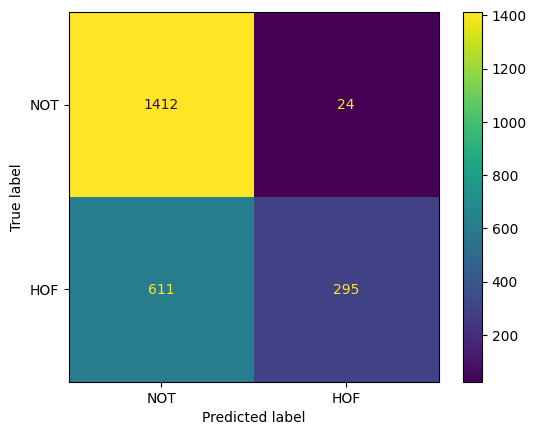



Validation Split
Computing different preformance metrics on valid set of Dataset
Accuracy: 0.6635354397950469
Recall (macro): 0.5773043927775795
Precision (macro): 0.6963071777961838
F1 Score (macro): 0.5453690857205922

Confusion Matrix:


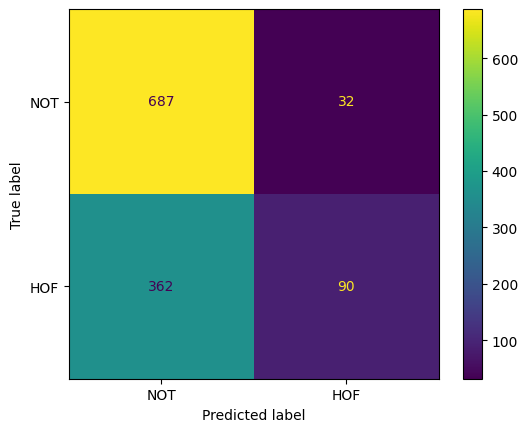

In [32]:
print('Train using of 50% of data')
model_1_50_file = train_method1(train_50_file, val_file, MODEL_1_50_DIRECTORY)

Train using of 75% of data
Let's start training FastText model
Saved model to  drive/MyDrive/./CE807/Part2/2201912/models/1/75/model.bin
Train Split
Computing different preformance metrics on train set of Dataset
Accuracy: 0.834044975804156
Recall (macro): 0.7996263433091266
Precision (macro): 0.8524530085158503
F1 Score (macro): 0.8133404312271235

Confusion Matrix:


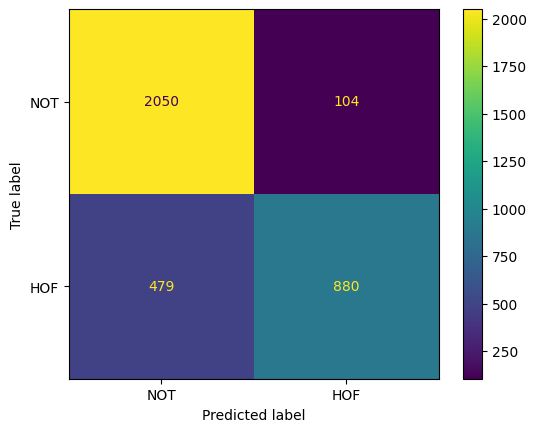



Validation Split
Computing different preformance metrics on valid set of Dataset
Accuracy: 0.677198975234842
Recall (macro): 0.6237584156953487
Precision (macro): 0.662011488233825
F1 Score (macro): 0.6238502328427207

Confusion Matrix:


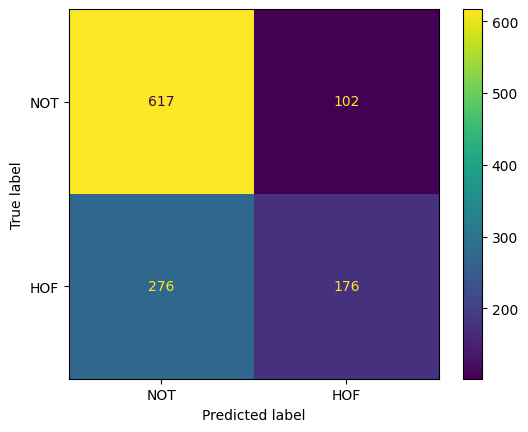

In [33]:
print('Train using of 75% of data')
model_1_75_file = train_method1(train_75_file, val_file, MODEL_1_75_DIRECTORY)

Train using of 100% of data
Let's start training FastText model
Saved model to  drive/MyDrive/./CE807/Part2/2201912/models/1/100/model.bin
Train Split
Computing different preformance metrics on train set of Dataset
Accuracy: 0.8883432963279249
Recall (macro): 0.8671926402134946
Precision (macro): 0.8980170942307232
F1 Score (macro): 0.8781131260800918

Confusion Matrix:


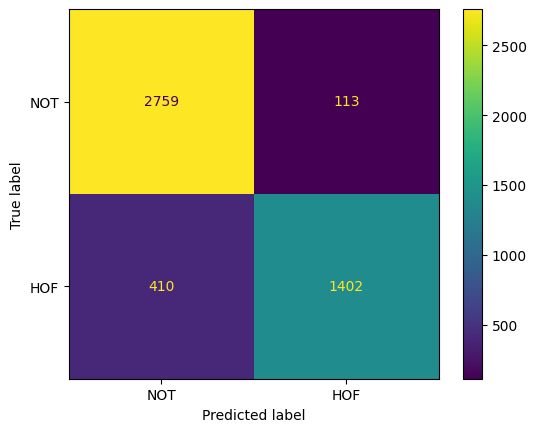



Validation Split
Computing different preformance metrics on valid set of Dataset
Accuracy: 0.681468830059778
Recall (macro): 0.6366835083141531
Precision (macro): 0.6634380473015733
F1 Score (macro): 0.6393921606022254

Confusion Matrix:


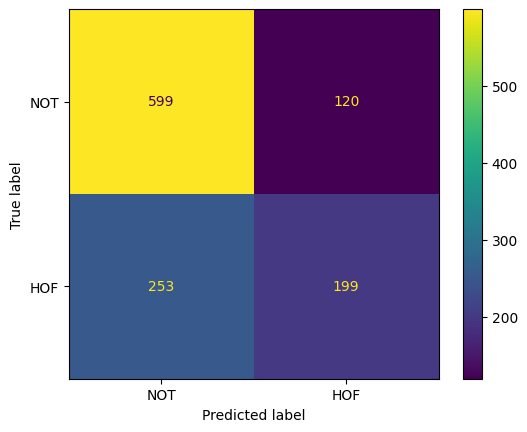

In [34]:
print('Train using of 100% of data')
model_1_100_file = train_method1(train_100_file, val_file, MODEL_1_100_DIRECTORY)

# Testing Method 1#


In [35]:
def test_method1(test_file, model_file, output_dir):
  test_df = load_csv_file(test_file)

  test_label = test_df['label']

  model = load_model1(model_file)

  test_dataset = prepare_dataset1(test_df)

  test_pred_labels = model1_predictions(model, test_dataset)

  test_df['out_label']  = test_pred_labels

  test_f1_score = compute_performance(test_label, test_pred_labels, action='test')

  out_file = os.path.join(output_dir, 'output_test.csv')

  print('Saving model output to', out_file)
  test_df.to_csv(out_file)

Testing using model trained on 25% data
Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/25/model.bin


Computing different preformance metrics on test set of Dataset
Accuracy: 0.7502168256721596
Recall (macro): 0.5
Precision (macro): 0.3751084128360798
F1 Score (macro): 0.42864222001982166

Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


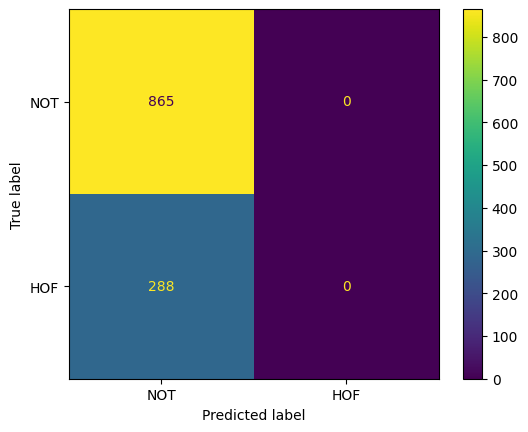



Saving model output to drive/MyDrive/./CE807/Part2/2201912/models/1/25/output_test.csv


In [36]:
print('Testing using model trained on 25% data')
test_method1(test_file, model_1_25_file, MODEL_1_25_DIRECTORY)

Testing using model trained on 50% data
Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/50/model.bin


Computing different preformance metrics on test set of Dataset
Accuracy: 0.7987857762359063
Recall (macro): 0.6111191393705845
Precision (macro): 0.8224836905871389
F1 Score (macro): 0.6249270875398214

Confusion Matrix:


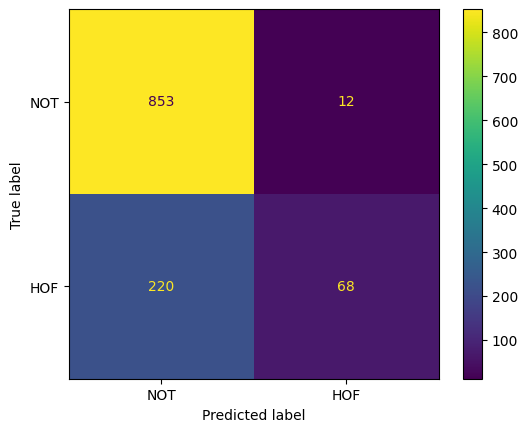



Saving model output to drive/MyDrive/./CE807/Part2/2201912/models/1/50/output_test.csv


In [37]:
print('Testing using model trained on 50% data')
test_method1(test_file, model_1_50_file, MODEL_1_50_DIRECTORY)

Testing using model trained on 75% data
Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/75/model.bin


Computing different preformance metrics on test set of Dataset
Accuracy: 0.753686036426713
Recall (macro): 0.6876043673731536
Precision (macro): 0.6767009966274973
F1 Score (macro): 0.6814694049073549

Confusion Matrix:


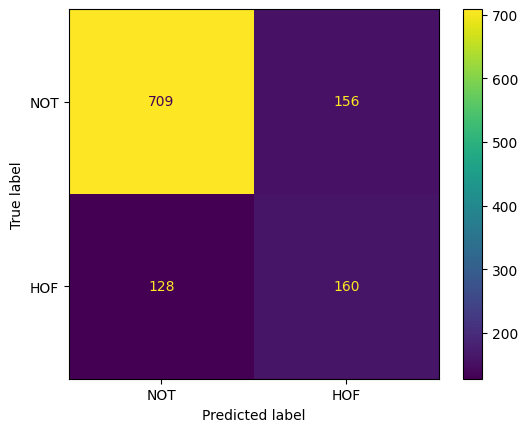



Saving model output to drive/MyDrive/./CE807/Part2/2201912/models/1/75/output_test.csv


In [38]:
print('Testing using model trained on 75% data')
test_method1(test_file, model_1_75_file, MODEL_1_75_DIRECTORY)

Testing using model trained on 100% data
Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/100/model.bin


Computing different preformance metrics on test set of Dataset
Accuracy: 0.6973113616652211
Recall (macro): 0.6778259473346178
Precision (macro): 0.642629010032325
F1 Score (macro): 0.6468073303824322

Confusion Matrix:


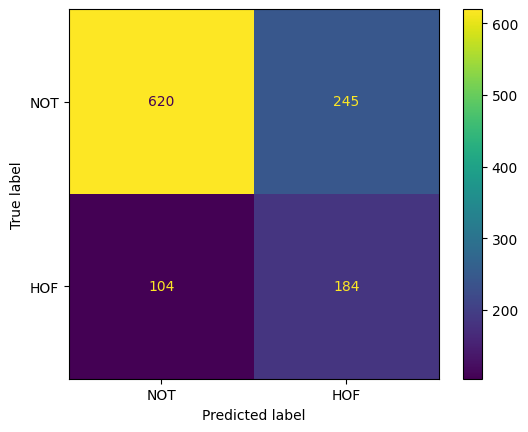



Saving model output to drive/MyDrive/./CE807/Part2/2201912/models/1/100/output_test.csv


In [39]:
print('Testing using model trained on 100% data')
test_method1(test_file, model_1_100_file, MODEL_1_100_DIRECTORY)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/25/model.bin
Computing different preformance metrics on comparison set of Dataset


Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/25/model.bin
Computing different preformance metrics on comparison set of Dataset


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/50/model.bin
Computing different preformance metrics on comparison set of Dataset


Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/50/model.bin


Computing different preformance metrics on comparison set of Dataset


Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/75/model.bin
Computing different preformance metrics on comparison set of Dataset


Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/75/model.bin


Computing different preformance metrics on comparison set of Dataset


Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/100/model.bin
Computing different preformance metrics on comparison set of Dataset




Loaded model from  drive/MyDrive/./CE807/Part2/2201912/models/1/100/model.bin
Computing different preformance metrics on comparison set of Dataset


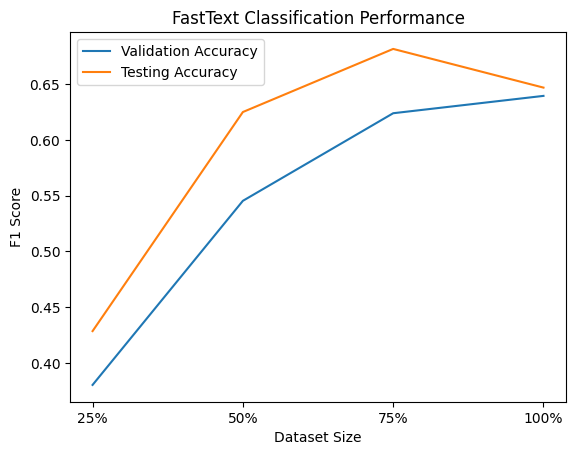

In [40]:
dataset_sizes = ['25%', '50%', '75%', '100%']

test_df = load_csv_file(test_file)
test_dataset = prepare_dataset1(test_df)
test_label = test_df['label']

validation_df = load_csv_file(val_file)
validation_dataset = prepare_dataset1(validation_df)
validation_label = validation_df['label']

models = [model_1_25_file, model_1_50_file, model_1_75_file, model_1_100_file]
validation_scores = []
testing_scores = []

for model in models:
  validation_pred_label = model1_predictions(load_model1(model), validation_dataset)
  validation_scores.append(compute_performance(validation_label, validation_pred_label, action = 'comparison'))

  testing_pred_label = model1_predictions(load_model1(model), test_dataset)
  testing_scores.append(compute_performance(test_label, testing_pred_label, action = 'comparison'))

plt.plot(dataset_sizes, validation_scores, label="Validation Accuracy")
plt.plot(dataset_sizes, testing_scores, label="Testing Accuracy")

plt.xlabel("Dataset Size")
plt.ylabel("F1 Score")
plt.title("FastText Classification Performance")
plt.legend()
plt.show()

#Method 2 ......CNN#

#Installing required library#

In [41]:
!pip install tensorflow

#Loading required libraries#

In [ ]:
import os
import pickle
import io
import numpy as np
import pandas as pd
import re
import csv
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Creating the subset of the train dataset#

In [54]:
def create_train_subsets(train_file):
    data = pd.read_csv(train_file)
    target_column = 'label' # Replace with the correct target column name

    train_data_100 = data
    train_data_75, _ = train_test_split(data, train_size=0.75, random_state=42, stratify=data['label'])
    train_data_50, _ = train_test_split(train_data_75, train_size=(2/3), random_state=42, stratify=train_data_75['label'])
    train_data_25, _ = train_test_split(train_data_50, train_size=0.5, random_state=42, stratify=train_data_50['label'])

    return train_data_100, train_data_75, train_data_50, train_data_25


student_id = 2201912
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Part2/', str(student_id))
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')

train_25_data = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv')
train_50_data = os.path.join(GOOGLE_DRIVE_PATH, 'train_50.csv')
train_75_data = os.path.join(GOOGLE_DRIVE_PATH, 'train_75.csv')
train_100_data = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')

train_data_100, train_data_75, train_data_50, train_data_25 = create_train_subsets(train_file)

train_25_data = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv')
train_50_data = os.path.join(GOOGLE_DRIVE_PATH, 'train_50.csv')
train_75_data = os.path.join(GOOGLE_DRIVE_PATH, 'train_75.csv')
train_100_data = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')

train_data_25.to_csv(train_25_data, index=False)
train_data_50.to_csv(train_50_data, index=False)
train_data_75.to_csv(train_75_data, index=False)
train_data_100.to_csv(train_100_data, index=False)

print('Train 25% file: ', train_25_data)
print('Train 50% file: ', train_50_data)
print('Train 75% file: ', train_75_data)
print('Train 100% file: ', train_file)

val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Val file: ', val_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)

print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

Train 25% file:  drive/MyDrive/./CE807/Part2/2201912/train_25.csv
Train 50% file:  drive/MyDrive/./CE807/Part2/2201912/train_50.csv
Train 75% file:  drive/MyDrive/./CE807/Part2/2201912/train_75.csv
Train 100% file:  drive/MyDrive/./CE807/Part2/2201912/train.csv
Val file:  drive/MyDrive/./CE807/Part2/2201912/valid.csv
Test file:  drive/MyDrive/./CE807/Part2/2201912/test.csv
List files:  ['test.csv', 'valid.csv', 'models', 'train_100.csv', 'train_25.csv', 'train_50.csv', 'train.csv', 'train_75.csv']


#Setting Model2 path, Directories and Output files#

In [55]:
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 2 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 2 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50') # Model 2 trained using 50% of train data directory
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)

MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75') # Model 2 trained using 75% of train data directory
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)

MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100') # Model 2 trained using 100% of train data directory
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)

#Output Test
model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 25% of train data
print('Output file name using model 2 using 100% of train data: ',model_2_25_output_test_file)

model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 50% of train data
print('Output file name using model 2 using 100% of train data: ',model_2_50_output_test_file)

model_2_75_output_test_file = os.path.join(MODEL_2_75_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 50% of train data
print('Output file name using model 2 using 100% of train data: ',model_2_75_output_test_file)

model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 100% of train data
print('Output file name using model 2 using 100% of train data: ',model_2_100_output_test_file)

Model 2 directory:  drive/MyDrive/./CE807/Part2/2201912/models/2
Model 2 directory with 25% data:  drive/MyDrive/./CE807/Part2/2201912/models/2/25
Model 2 directory with 50% data:  drive/MyDrive/./CE807/Part2/2201912/models/2/50
Model 2 directory with 75% data:  drive/MyDrive/./CE807/Part2/2201912/models/2/75
Model 2 directory with 100% data:  drive/MyDrive/./CE807/Part2/2201912/models/2/100
Output file name using model 2 using 100% of train data:  drive/MyDrive/./CE807/Part2/2201912/models/2/25/output_test.csv
Output file name using model 2 using 100% of train data:  drive/MyDrive/./CE807/Part2/2201912/models/2/50/output_test.csv
Output file name using model 2 using 100% of train data:  drive/MyDrive/./CE807/Part2/2201912/models/2/75/output_test.csv
Output file name using model 2 using 100% of train data:  drive/MyDrive/./CE807/Part2/2201912/models/2/100/output_test.csv


#Preprocessing#

In [56]:
def cleanup_text(text):
  text = text.lower() # Convert to lower case
  text = ' '.join(text.split()) # Strip breaklines, tabs and extra whitespace
  text = re.sub(r'[^\w\s]+', '', text) # Strip non-alphanumeric characters

  return remove_stopwords(text)

# Creating a function to prepare dataset for CNN classification#

In [57]:
def prepare_dataset2(file, tokenizer, train=True, maxlen=None):
    data = pd.read_csv(file, delimiter=',')
    texts = data['text'].apply(cleanup_text).tolist()

    if train:
        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(texts)

    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

    if train:
        label_encoder = LabelEncoder()
        labels = label_encoder.fit_transform(data['label'])
    else:
        labels = data['label']

    return padded_sequences, labels, tokenizer

#Function for label preprocessing#

In [58]:
def preprocess_labels(labels):
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    return encoded_labels, label_encoder

# Load the datasets
train_data = pd.read_csv(train_file)
val_data = pd.read_csv(val_file)

# Extract the labels from the datasets
train_labels = train_data['label']
val_labels = val_data['label']

# Preprocess the labels
train_labels, train_label_encoder = preprocess_labels(train_labels)
val_labels, val_label_encoder = preprocess_labels(val_labels)

In [59]:
def train_model2(input_length, train_data, train_labels, val_data, val_labels, random_seed=2201912):
    # Set the random seed for reproducibility
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)

    # Define the model architecture
    model = Sequential()
    model.add(Embedding(20000, 128, input_length=input_length))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # Compile the model with the Adam optimizer and its default learning rate
    model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

    # Train the model
    history = model.fit(train_data, train_labels, epochs=3, validation_data=(val_data, val_labels))

    return model, history

In [60]:
def save_model2(model, tokenizer, label_encoder, model_dir):
    model_file = os.path.join(model_dir, 'model.h5')
    model.save(model_file)  # Changed from pickle.dump to model.save
    print('Saved model to ', model_file)

    tokenizer_file = os.path.join(model_dir, 'tokenizer.pkl')
    with open(tokenizer_file, 'wb') as f:  # Changed from pickle.dump to with open
        pickle.dump(tokenizer, f)
    print('Saved tokenizer to ', tokenizer_file)

    label_encoder_file = os.path.join(model_dir, 'label_encoder.pkl')
    with open(label_encoder_file, 'wb') as f:  # Changed from pickle.dump to with open
        pickle.dump(label_encoder, f)
    print('Saved label_encoder to ', label_encoder_file)

    return model_file, tokenizer_file, label_encoder_file

In [61]:
def load_model2(model_file, tokenizer_file, label_encoder_file):
       # Load the model from the file
    model = tf.keras.models.load_model(model_file)
    print('Loaded model from', model_file)

    # Load the tokenizer from the file
    with open(tokenizer_file, 'rb') as f:
        tokenizer = pickle.load(f)
    print('Loaded tokenizer from', tokenizer_file)

    # Load the label_encoder from the file
    with open(label_encoder_file, 'rb') as f:
        label_encoder = pickle.load(f)
    print('Loaded label_encoder from', label_encoder_file)

    return model, tokenizer, label_encoder

#Training Method 2#

In [62]:
def train_method2(train_file, val_file, output_dir, input_length=200):
    # Load data from CSV files
    train_data = pd.read_csv(train_file)
    val_data = pd.read_csv(val_file)

    # Extract texts and labels
    train_texts = train_data['text']
    val_texts = val_data['text']
    train_labels = train_data['label']
    val_labels = val_data['label']

    # Preprocess the labels
    train_labels, train_label_encoder = preprocess_labels(train_labels)
    val_labels, val_label_encoder = preprocess_labels(val_labels)

    # Tokenize the texts
    tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
    tokenizer.fit_on_texts(train_texts)
    train_sequences = tokenizer.texts_to_sequences(train_texts)
    val_sequences = tokenizer.texts_to_sequences(val_texts)

    # Pad the sequences
    train_sequences = pad_sequences(train_sequences, maxlen=input_length, padding="post", truncating="post")
    val_sequences = pad_sequences(val_sequences, maxlen=input_length, padding="post", truncating="post")

    # Train the model
    model, history = train_model2(input_length, train_sequences, train_labels, val_sequences, val_labels)

    # Compute F1 score and confusion matrix for training split
    train_preds = model.predict(train_sequences)
    train_preds = np.argmax(train_preds, axis=1)
    train_f1 = f1_score(train_labels, train_preds, average='macro')
    train_cm = confusion_matrix(train_labels, train_preds)
    print("Training F1 score:", train_f1)
    print("Training confusion matrix:")
    print(train_cm)

    # Compute F1 score and confusion matrix for validation split
    val_preds = model.predict(val_sequences)
    val_preds = np.argmax(val_preds, axis=1)
    val_f1 = f1_score(val_labels, val_preds, average='macro')
    val_cm = confusion_matrix(val_labels, val_preds)
    print("Validation F1 score:", val_f1)
    print("Validation confusion matrix:")
    print(val_cm)

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # Save model, tokenizer, and label_encoder
    model_file = os.path.join(output_dir, "model.h5")
    tokenizer_file = os.path.join(output_dir, "tokenizer.pkl")
    label_encoder_file = os.path.join(output_dir, "label_encoder.pkl")

    model.save(model_file)
    with open(tokenizer_file, "wb") as f:
        pickle.dump(tokenizer, f)
    with open(label_encoder_file, "wb") as f:
        pickle.dump(train_label_encoder, f)

    return model_file, tokenizer_file, label_encoder_file

Training and saving model for 25% data in drive/MyDrive/./CE807/Part2/2201912/models/2/25
Epoch 1/3
37/37 [==============================] - 10s 227ms/step - loss: 0.7563 - accuracy: 0.5453 - val_loss: 0.6800 - val_accuracy: 0.6140
Epoch 2/3
37/37 [==============================] - 6s 162ms/step - loss: 0.6569 - accuracy: 0.6145 - val_loss: 0.6807 - val_accuracy: 0.6140
Epoch 3/3
37/37 [==============================] - 1s 27ms/step
Training F1 score: 0.9346467391304347
Training confusion matrix:
[[443   9]
 [ 65 653]]
37/37 [==============================] - 1s 27ms/step
Validation F1 score: 0.593173902336054
Validation confusion matrix:
[[307 145]
 [329 390]]


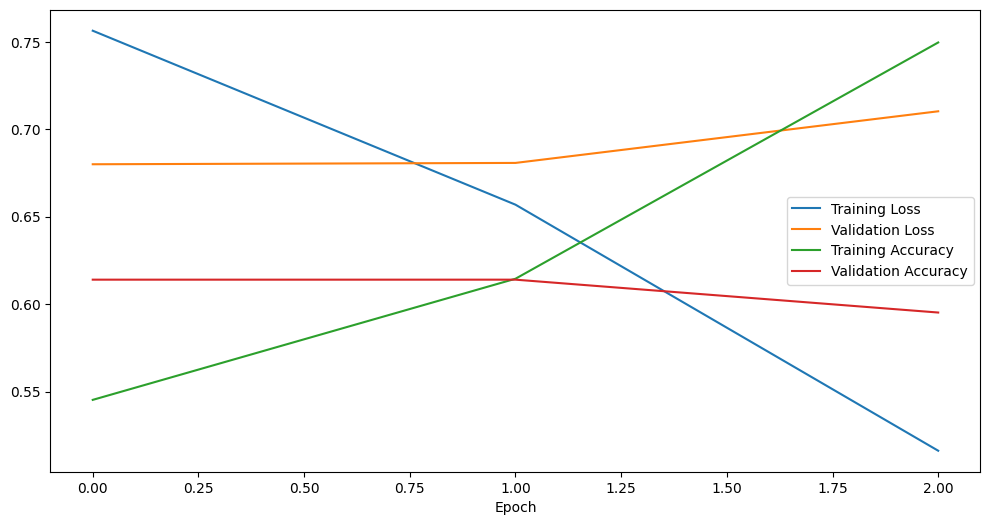

Training and saving model for 50% data in drive/MyDrive/./CE807/Part2/2201912/models/2/50
Epoch 1/3
74/74 [==============================] - 14s 180ms/step - loss: 0.7079 - accuracy: 0.5927 - val_loss: 0.6624 - val_accuracy: 0.6140
Epoch 2/3
74/74 [==============================] - 20s 274ms/step - loss: 0.6141 - accuracy: 0.6731 - val_loss: 0.6490 - val_accuracy: 0.6285
Epoch 3/3
74/74 [==============================] - 3s 40ms/step
Training F1 score: 0.9932389626064551
Training confusion matrix:
[[ 896    8]
 [   7 1429]]
37/37 [==============================] - 1s 28ms/step
Validation F1 score: 0.5954943595669807
Validation confusion matrix:
[[215 237]
 [206 513]]


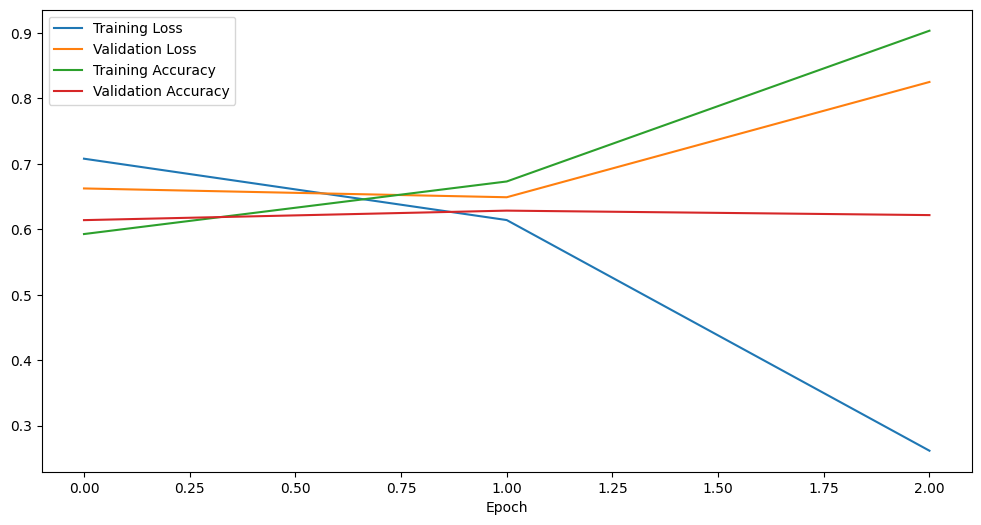

Training and saving model for 75% data in drive/MyDrive/./CE807/Part2/2201912/models/2/75
Epoch 1/3
110/110 [==============================] - 19s 160ms/step - loss: 0.6904 - accuracy: 0.6028 - val_loss: 0.6397 - val_accuracy: 0.6208
Epoch 2/3
110/110 [==============================] - 22s 197ms/step - loss: 0.5313 - accuracy: 0.7333 - val_loss: 0.6559 - val_accuracy: 0.6319
Epoch 3/3
110/110 [==============================] - 3s 28ms/step
Training F1 score: 0.993688401223479
Training confusion matrix:
[[1344   12]
 [   9 2145]]
37/37 [==============================] - 2s 46ms/step
Validation F1 score: 0.6030687878513965
Validation confusion matrix:
[[256 196]
 [254 465]]


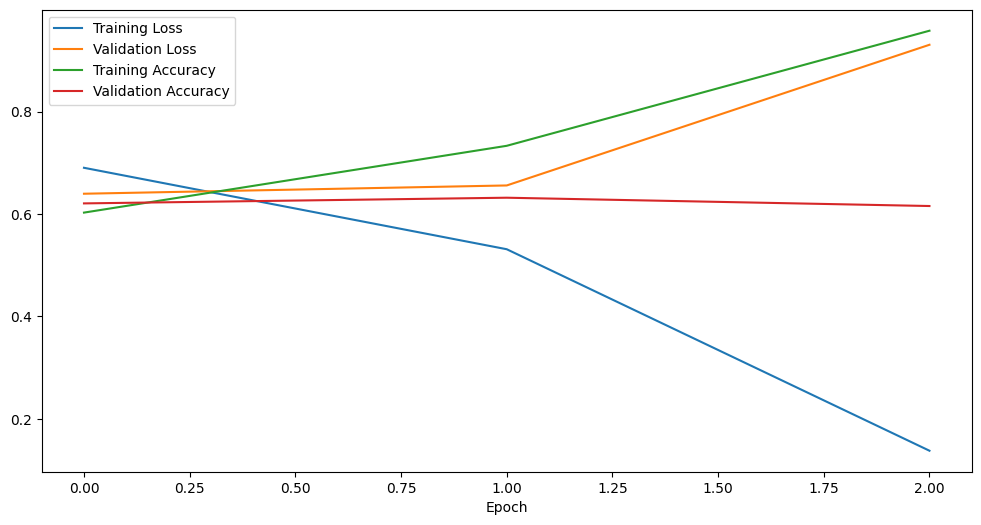

Training and saving model for 100% data in drive/MyDrive/./CE807/Part2/2201912/models/2/100
Epoch 1/3
147/147 [==============================] - 30s 191ms/step - loss: 0.6843 - accuracy: 0.6082 - val_loss: 0.6542 - val_accuracy: 0.6123
Epoch 2/3
147/147 [==============================] - 23s 155ms/step - loss: 0.5285 - accuracy: 0.7351 - val_loss: 0.6482 - val_accuracy: 0.6533
Epoch 3/3
147/147 [==============================] - 4s 29ms/step
Training F1 score: 0.9910011745956682
Training confusion matrix:
[[1795   14]
 [  26 2846]]
37/37 [==============================] - 1s 28ms/step
Validation F1 score: 0.6024375961676229
Validation confusion matrix:
[[220 232]
 [204 515]]


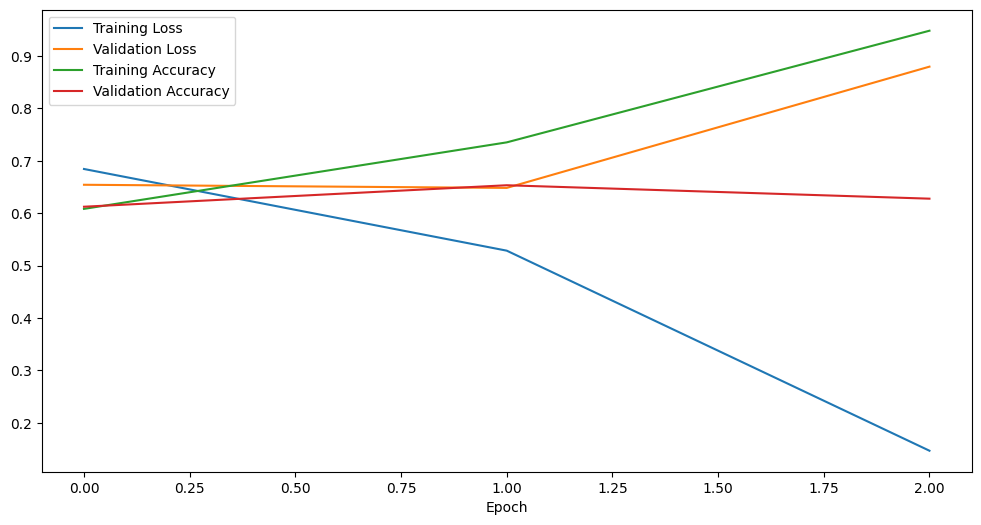

In [63]:
# Create directories if they don't exist
for directory in [MODEL_2_25_DIRECTORY, MODEL_2_50_DIRECTORY, MODEL_2_75_DIRECTORY, MODEL_2_100_DIRECTORY]:
    if not os.path.exists(directory):
        os.makedirs(directory)

train_files = [train_25_data, train_50_data, train_75_data, train_100_data]
model_directories = [MODEL_2_25_DIRECTORY, MODEL_2_50_DIRECTORY, MODEL_2_75_DIRECTORY, MODEL_2_100_DIRECTORY]
subset_percentages = ['25%', '50%', '75%', '100%']

for train_file, output_dir, percentage in zip(train_files, model_directories, subset_percentages):
    print(f"Training and saving model for {percentage} data in {output_dir}")
    model_file, tokenizer_file, label_encoder_file = train_method2(train_file, val_file, output_dir)

#Testing the Method 2#

In [64]:
def test_method2(test_file, model_file, tokenizer_file, label_encoder_file, output_dir, maxlen):
    # Load tokenizer and label encoder
    with open(tokenizer_file, 'rb') as handle:
        tokenizer = pickle.load(handle)

    with open(label_encoder_file, 'rb') as handle:
        label_encoder = pickle.load(handle)

    # Prepare test dataset
    test_data, test_label, _ = prepare_dataset2(test_file, tokenizer, train=False, maxlen=maxlen)
    model, tokenizer, label_encoder = load_model2(model_file, tokenizer_file, label_encoder_file)

    # Predict and evaluate the model
    y_pred = model.predict(test_data)
    y_pred_labels = np.argmax(y_pred, axis=1)

    y_true_labels = label_encoder.transform(test_label)

    # Compute performance metrics
    f1 = f1_score(y_true_labels, y_pred_labels, average='macro')
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    print("Test F1 score:", f1)
    print("Test confusion matrix:")
    print(cm)

    # Save the output file
    output_file = os.path.join(output_dir, "output_test.csv")
    test_df = pd.read_csv(test_file, delimiter=',', dtype=str)  # Read test_file as DataFrame
    with open(output_file, "w", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["text_id", "text", "label", "out_label"])
        for i, (text_id, text, true_label, pred_label) in enumerate(zip(test_df["text_id"], test_df["text"], y_true_labels, y_pred_labels)):
            writer.writerow([id, text, label_encoder.inverse_transform([true_label])[0], label_encoder.inverse_transform([pred_label])[0]])

    return output_file

#Saving model,tokenizer and label encoder#

In [65]:
# Define the required variables

model_files = [os.path.join(MODEL_2_25_DIRECTORY, 'model.h5'),
               os.path.join(MODEL_2_50_DIRECTORY, 'model.h5'),
               os.path.join(MODEL_2_75_DIRECTORY, 'model.h5'),
               os.path.join(MODEL_2_100_DIRECTORY, 'model.h5')]

tokenizer_files = [os.path.join(MODEL_2_25_DIRECTORY, 'tokenizer.pkl'),
                    os.path.join(MODEL_2_50_DIRECTORY, 'tokenizer.pkl'),
                    os.path.join(MODEL_2_75_DIRECTORY, 'tokenizer.pkl'),
                    os.path.join(MODEL_2_100_DIRECTORY, 'tokenizer.pkl')]

label_encoder_files = [os.path.join(MODEL_2_25_DIRECTORY, 'label_encoder.pkl'),
                    os.path.join(MODEL_2_50_DIRECTORY, 'label_encoder.pkl'),
                    os.path.join(MODEL_2_75_DIRECTORY, 'label_encoder.pkl'),
                    os.path.join(MODEL_2_100_DIRECTORY, 'label_encoder.pkl')]


output_directories = [MODEL_2_25_DIRECTORY, MODEL_2_50_DIRECTORY, MODEL_2_75_DIRECTORY, MODEL_2_100_DIRECTORY]
subset_percentages = ['25%', '50%', '75%', '100%']

In [66]:
train_files = [train_25_data, train_50_data, train_75_data, train_100_data]
model_directories = [MODEL_2_25_DIRECTORY, MODEL_2_50_DIRECTORY, MODEL_2_75_DIRECTORY, MODEL_2_100_DIRECTORY]
subset_percentages = ['25%', '50%', '75%', '100%']

input_length = 200  # Set this to the desired value

for model_file, tokenizer_file, label_encoder_file, output_dir, percentage in zip(model_files, tokenizer_files, label_encoder_files, model_directories, subset_percentages):
    print(f'Testing using model trained on {percentage} data')
    output_file = test_method2(test_file, model_file, tokenizer_file, label_encoder_file, output_dir, input_length)



Testing using model trained on 25% data
Loaded model from drive/MyDrive/./CE807/Part2/2201912/models/2/25/model.h5
Loaded tokenizer from drive/MyDrive/./CE807/Part2/2201912/models/2/25/tokenizer.pkl
Loaded label_encoder from drive/MyDrive/./CE807/Part2/2201912/models/2/25/label_encoder.pkl
37/37 [==============================] - 1s 26ms/step
Test F1 score: 0.5510938370555343
Test confusion matrix:
[[159 129]
 [335 530]]
Testing using model trained on 50% data
Loaded model from drive/MyDrive/./CE807/Part2/2201912/models/2/50/model.h5
Loaded tokenizer from drive/MyDrive/./CE807/Part2/2201912/models/2/50/tokenizer.pkl
Loaded label_encoder from drive/MyDrive/./CE807/Part2/2201912/models/2/50/label_encoder.pkl
37/37 [==============================] - 1s 27ms/step
Test F1 score: 0.6064945899484275
Test confusion matrix:
[[152 136]
 [242 623]]
Testing using model trained on 75% data
Loaded model from drive/MyDrive/./CE807/Part2/2201912/models/2/75/model.h5
Loaded tokenizer from drive/MyDrive

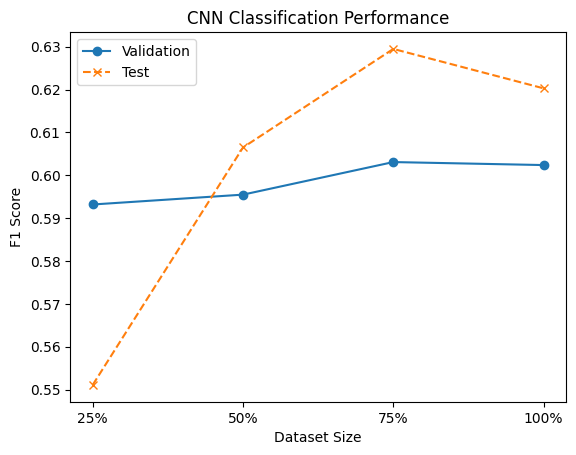

In [70]:
import matplotlib.pyplot as plt

dataset_sizes = ['25%', '50%', '75%', '100%']

validation_f1_scores = [0.5932, 0.5955, 0.6031, 0.6024]
test_f1_scores = [0.5511, 0.6065, 0.6295, 0.6203]

plt.plot(dataset_sizes, validation_f1_scores, marker='o', linestyle='-', label='Validation')
plt.plot(dataset_sizes, test_f1_scores, marker='x', linestyle='--', label='Test')

plt.xlabel('Dataset Size')
plt.ylabel('F1 Score')
plt.title('CNN Classification Performance')
plt.legend()

plt.savefig('performance_plot.png')
plt.show()

#Code Reference#

The code utilized in this assignment have been derived from the following additional sources..

*https://scikit-learn.org/stable/user_guide.html

*https://towardsdatascience.com/fasttext-for-text-classification-a4b38cbff27c

*https://www.kaggle.com/code/au1206/text-classification-using-

*https://towardsdatascience.com/text-classification-with-cnns-in-pytorch-1113df31e79f
